<h1>MSSV: 22521034</h1>
<h1>Họ tên: Huỳnh Yến Nhi</h1>

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split


In [3]:
digits=datasets.load_digits()

Biểu diễn 4 mẫu dữ liệu huấn luyện tương ứng với 4 lớp 0, 1, 2, 3

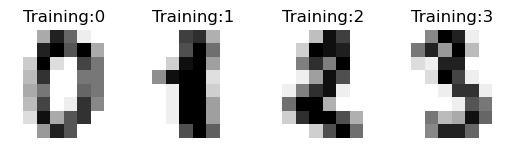

In [9]:
_, axes = plt.subplots(1,4)
images_and_labels = list(zip(digits.images,digits.target))
for ax, (image, label) in zip(axes,images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Training:%i'% label)
plt.show()

Chuyển đổi mỗi đối tượng hình ảnh – ma trận 8x8 thành ma trận 1x64 để thỏa yêu
cầu đầu vào của thuật toán.

In [11]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

Sử dụng thuật toán cây ID3

In [13]:
classifier = tree.DecisionTreeClassifier(criterion="entropy",random_state=33)

Chia dữ liệu thành hai phần: huấn luyện 80%, kiểm thử 20%

In [17]:
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.2,shuffle=False)

Tiến hành xây dựng cây ID3

In [19]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

Dự đoán nhãn dữ liệu cho tập kiểm thử


In [25]:
predicted = classifier.predict(X_test)

Biểu diễn một vài kết quả dự đoán

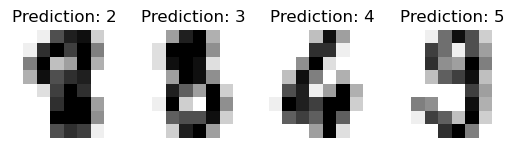

In [29]:
_, axes = plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples //2:], predicted))
for ax, (image, prediction ) in zip(axes, images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show()

Thông số đạt được của cây ID3

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360


Confusion matrix:
[[31  0  0  0  1  0  0  0  1  2]
 [ 0 23  0  2  2  0  0  1  1  7]
 [ 1  2 26  0  0  1  0  3  2  0]
 [ 0  4  2 22  0  4  0  

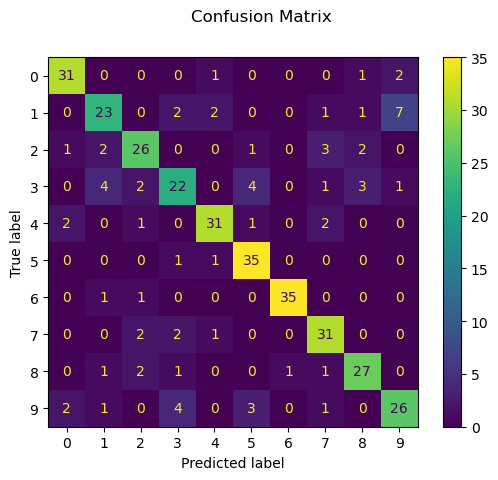

In [61]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" %disp.confusion_matrix)

In [63]:
from PIL import Image, ImageOps
import numpy as np

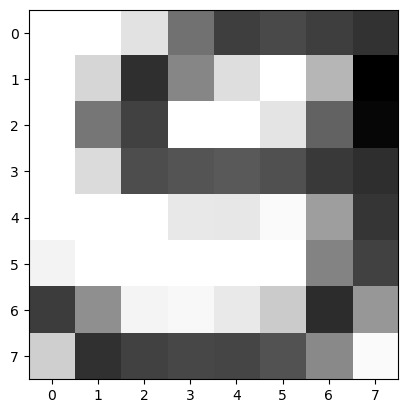

In [65]:
img = Image.open('So9.png').convert("L").resize((8,8))
img = ImageOps.invert(img)
im2arr = np.array(img)
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [67]:
img1d=im2arr.reshape([1,64])
img1d[img1d > 189] = 155
img1d[img1d < 110] = 0
img1d

array([[  0,   0,   0, 141, 155, 182, 155, 155,   0,   0, 155, 121,   0,
          0,   0, 155,   0, 137, 155,   0,   0,   0, 156, 155,   0,   0,
        178, 171, 165, 175, 155, 155,   0,   0,   0,   0,   0,   0,   0,
        155,   0,   0,   0,   0,   0,   0, 124, 189, 155, 112,   0,   0,
          0,   0, 155,   0,   0, 155, 155, 184, 186, 172, 118,   0]],
      dtype=uint8)

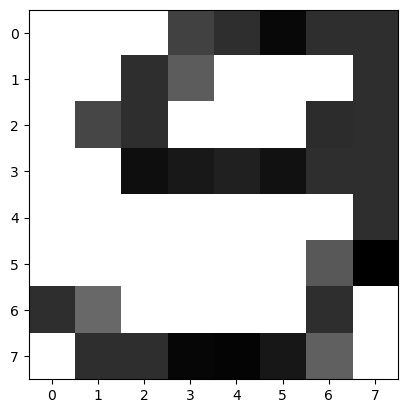

In [69]:
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

Tiến hành nhận diện bằng cây ID3 và in ra kết quả

In [74]:
y_pred = classifier.predict(img1d)
print(y_pred)

[4]
